# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
import json

pprint = pprint.pprint


# Import API key
from api_keys import api_key
import api_keys


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#Start counter
city_number = 1

print("Beginning Data Retrieval")
print("-------------------------")

#Loop through all cities in the list
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {city_number} | {city_record}")
        
        
       #Add to counter
        city_number = city_number + 1
            
        #Rate Limit
        time.sleep(1.01)
        
    except:
            print("City not found. Skipping...")
        
    continue


Beginning Data Retrieval
-------------------------
Processing Record 1 | Atuona
Processing Record 2 | Kabalo
Processing Record 3 | Matay
Processing Record 4 | Bredasdorp
Processing Record 5 | Kapaa
Processing Record 6 | Rikitea
Processing Record 7 | Mataura
Processing Record 8 | Dikson
Processing Record 9 | Arraial do Cabo
Processing Record 10 | Cherskiy
Processing Record 11 | Viiratsi
Processing Record 12 | New Norfolk
Processing Record 13 | Ushuaia
Processing Record 14 | Yellowknife
Processing Record 15 | Mackay
Processing Record 16 | East London
Processing Record 17 | Ilulissat
Processing Record 18 | Qaanaaq
Processing Record 19 | Saint-Joseph
Processing Record 20 | Taltal
Processing Record 21 | Lasa
Processing Record 22 | Saint George
Processing Record 23 | Hermanus
Processing Record 24 | Upernavik
Processing Record 25 | Radomsko
Processing Record 26 | Avarua
Processing Record 27 | Hami
Processing Record 28 | Albany
Processing Record 29 | San Juan de Uraba
Processing Record 30 | Hi

Processing Record 226 | Malkangiri
Processing Record 227 | Adrar
Processing Record 228 | Mar del Plata
Processing Record 229 | Itarema
Processing Record 230 | Dunedin
Processing Record 231 | Margate
Processing Record 232 | Victoria
Processing Record 233 | Imeni Poliny Osipenko
Processing Record 234 | Padang
Processing Record 235 | Hargeysa
Processing Record 236 | Leningradskiy
Processing Record 237 | Pevek
Processing Record 238 | Coruripe
Processing Record 239 | Pouembout
Processing Record 240 | Puerto Penasco
Processing Record 241 | Zalantun
Processing Record 242 | Alenquer
Processing Record 243 | Portland
Processing Record 244 | Kalat
Processing Record 245 | Alice Springs
Processing Record 246 | Longyearbyen
Processing Record 247 | Oga
Processing Record 248 | Anshun
City not found. Skipping...
Processing Record 249 | Georgetown
Processing Record 250 | Novo Aripuana
Processing Record 251 | Mercedes
Processing Record 252 | Port Elizabeth
City not found. Skipping...
City not found. Skip

Processing Record 451 | San Martin
Processing Record 452 | Wanning
Processing Record 453 | Dukat
Processing Record 454 | Mount Isa
Processing Record 455 | Khani
Processing Record 456 | Sorada
Processing Record 457 | Sao Desiderio
Processing Record 458 | Tezu
City not found. Skipping...
Processing Record 459 | Gidam
Processing Record 460 | Nago
Processing Record 461 | Pangnirtung
Processing Record 462 | Areosa
Processing Record 463 | Gawler
Processing Record 464 | Vaitape
Processing Record 465 | Hualmay
Processing Record 466 | Soyo
Processing Record 467 | Stokmarknes
Processing Record 468 | Colares
Processing Record 469 | Yatou
Processing Record 470 | Khasan
City not found. Skipping...
Processing Record 471 | Lidkoping
Processing Record 472 | Mount Gambier
Processing Record 473 | Akdepe
Processing Record 474 | Grindavik
Processing Record 475 | Yantikovo
Processing Record 476 | Iquitos
Processing Record 477 | Sitka
Processing Record 478 | Bandarbeyla
Processing Record 479 | Taoudenni
Pro

In [12]:
#Create a dictionary of weather data
Weather_Dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

#Create df
Weather_Data = pd.DataFrame(Weather_Dict)

#Display count
Weather_Data.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Latitude      550
Longitude     550
Max Temp      550
Wind Speed    550
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create csv from Weather Data DataFrame
Weather_Data.to_csv('Weather_Data.csv')

In [14]:
#Print Weather DataFrame head
Weather_Data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Atuona,17,PF,1559667798,76,-9.80,-139.03,82.64,20.02
1,Kabalo,0,CD,1559668351,37,-6.05,26.92,76.16,3.87
2,Matay,16,EG,1559668352,22,28.42,30.79,93.08,16.20
3,Bredasdorp,100,ZA,1559668353,88,-34.53,20.04,60.01,3.00
4,Kapaa,75,US,1559667895,88,22.08,-159.32,75.20,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

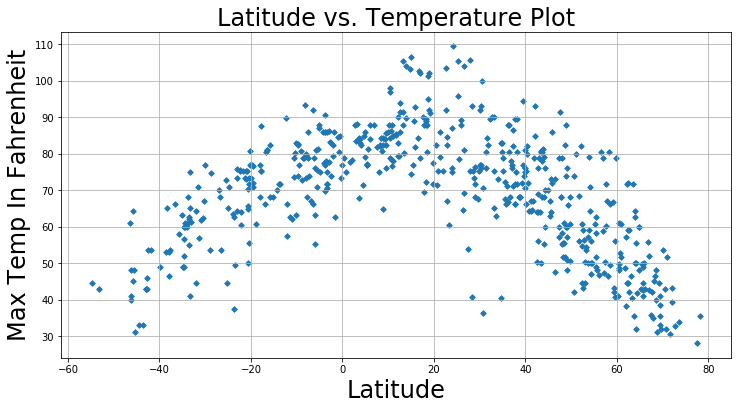

In [20]:
plt.figure(figsize=(12,6)) 
plt.scatter(Weather_Data["Latitude"], Weather_Data["Max Temp"], marker="D", s=15) 
plt.title("Latitude vs. Temperature Plot", fontsize=24)
plt.ylabel("Max Temp In Fahrenheit", fontsize=24)
plt.xlabel("Latitude", fontsize=24)
plt.grid(True)

           
plt.savefig("MaxTemp_vs_Latitude")
plt.show()

#### Latitude vs. Humidity Plot

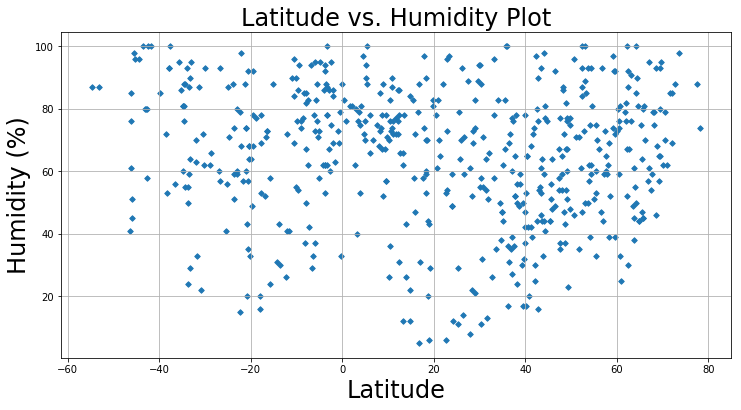

In [23]:
plt.figure(figsize=(12,6)) 
plt.scatter(Weather_Data["Latitude"], Weather_Data["Humidity"], marker="D", s=15)
plt.title("Latitude vs. Humidity Plot", fontsize=24)
plt.ylabel("Humidity (%)", fontsize=24)
plt.xlabel("Latitude", fontsize=24)
plt.grid(True)


plt.savefig("Humidity _vs_Latitude")
plt.show()

#### Latitude vs. Cloudiness Plot

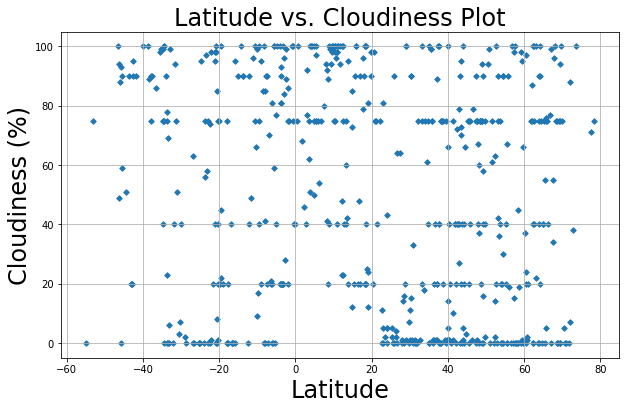

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(Weather_Data["Latitude"], Weather_Data["Cloudiness"], marker="D", s=15)
plt.title("Latitude vs. Cloudiness Plot", fontsize=24)
plt.ylabel("Cloudiness (%)", fontsize=24)
plt.xlabel("Latitude", fontsize=24)
plt.grid(True)


plt.savefig("Cloudiness_vs_Latitude")
plt.show()

#### Latitude vs. Wind Speed Plot

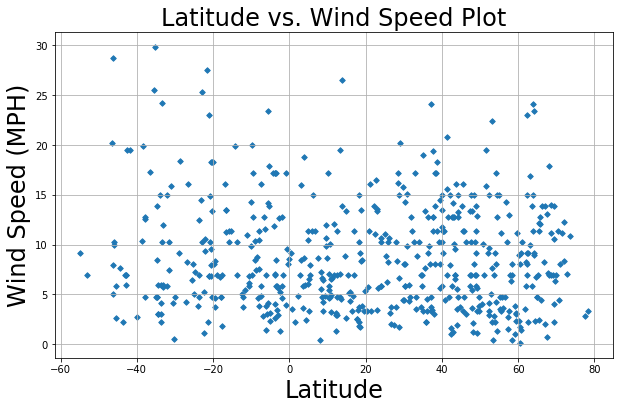

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(Weather_Data["Latitude"], Weather_Data["Wind Speed"], marker="D", s=15)
plt.title("Latitude vs. Wind Speed Plot",fontsize=24)
plt.ylabel("Wind Speed (MPH)", fontsize=24)
plt.xlabel("Latitude", fontsize=24)
plt.grid(True)


plt.savefig("WindSpeed_vs_Latitude")